In [1]:
import pandas as pd
data=pd.read_csv('/content/slr.csv')

In [2]:
data

,chirps per second,temperature (F)
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998
5,15.500000,75.199997
6,14.700000,69.699997
7,17.100000,82.000000
8,15.400000,69.400002
9,16.200001,83.300003


In [4]:
X = data[['chirps per second']] 
y = data['temperature (F)']

In [6]:
#Important note:The random state hyperparameter in the train_test_split() function controls
#the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. 
#With random_state=0 , we get the same train and test sets across different executions.
#With random_state=0 , we get the same train and test sets across different executions. With random_state=42, 
#we get the same train and test sets across different executions, but in this time, the train and test sets are different from the previous case with random_state=0

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.3)

In [7]:
from sklearn.linear_model import LinearRegression 

In [8]:
slr_model = LinearRegression()

In [9]:
slr_model.fit(X_train, y_train)

LinearRegression()

In [10]:
#To see the simple linear regression parameters
slope = slr_model.coef_
y_intercept = slr_model.intercept_

In [14]:
slope

array([3.54577187])

In [12]:
y_intercept

20.624799623415704

In [15]:
y_pred_train = slr_model.predict(X_train)

In [16]:
from sklearn.metrics import r2_score, mean_squared_error
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)

In [20]:
r2_train

0.6894061834385429

In [21]:
mse_train  

15.12853227265155

In [22]:
y_pred_test = slr_model.predict(X_test)

In [23]:
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)             

In [24]:
#coefficient of determination
r2_test

0.5230410019808561

In [25]:
mse_test

8.781008922400984

In [27]:
#import pandas
import pandas as pd
# load dataset
pima = pd.read_csv('/content/diabetes.csv')
pima.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [28]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'Age','Glucose','BMI','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X1_train,X1_test,y_train,y_test=train_test_split(X1,y,test_size=0.25,random_state=0)


In [30]:
# import the class
from sklearn.linear_model import LogisticRegression 

# instantiate the model (using the default parameters)
logreg = LogisticRegression()
logreg.fit(X1_train, y_train)

y_pred=logreg.predict(X1_test)


In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
print (accuracy)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

0.7916666666666666


array([[117,  13],
       [ 27,  35]])

Text(0.5, 257.44, 'Predicted label')

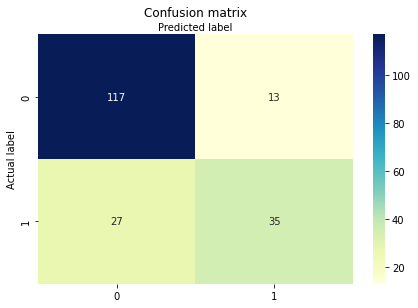

In [33]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label') 


In [34]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.7916666666666666
Precision: 0.7291666666666666
Recall: 0.5645161290322581


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


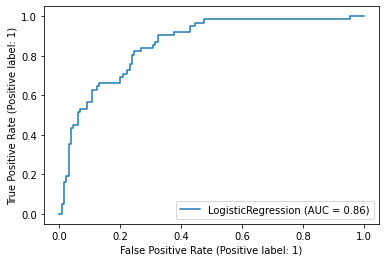

In [35]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(logreg, X1_test, y_test)
